# Exploratory Data Analysis (EDA) 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Show plots inline
%matplotlib inline

In [61]:
# load clearned training and testing datasets
df_train = pd.read_csv('df_train_cleaned.csv')
df_test = pd.read_csv('df_test_cleaned.csv')

In [62]:
df_train.shape

(1460, 74)

In [63]:
df_test.shape

(1459, 73)

# 1. Clean Up Missing Values

In [64]:
# only show columns with missing values of Train data
print("Train data_columns with missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

Train data_columns with missing values


,count,%
Electrical,1,0.068493
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


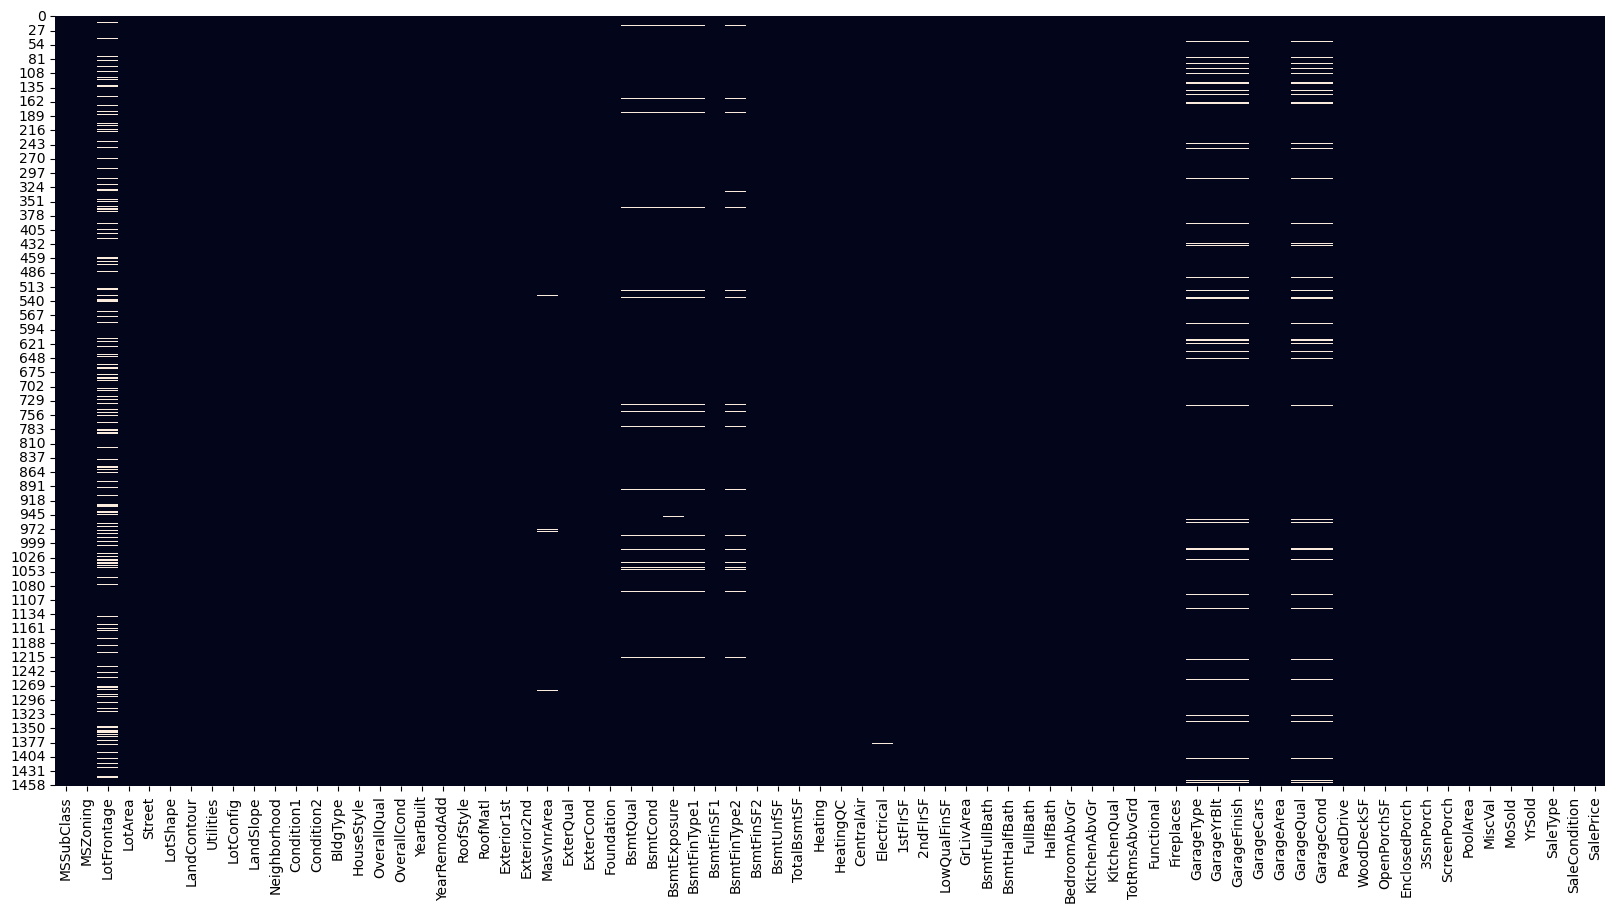

In [65]:
# display the missing value distribution in train data
plt.figure(figsize=(20, 10))
sns.heatmap(df_train.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

In [66]:
# only show columns with missing values of Test data
print("Test data_columns with missing values")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

Test data_columns with missing values


,count,%
BsmtUnfSF,1,0.068540
GarageArea,1,0.068540
GarageCars,1,0.068540
KitchenQual,1,0.068540
TotalBsmtSF,1,0.068540
BsmtFinSF2,1,0.068540
BsmtFinSF1,1,0.068540
SaleType,1,0.068540
Exterior1st,1,0.068540
Exterior2nd,1,0.068540


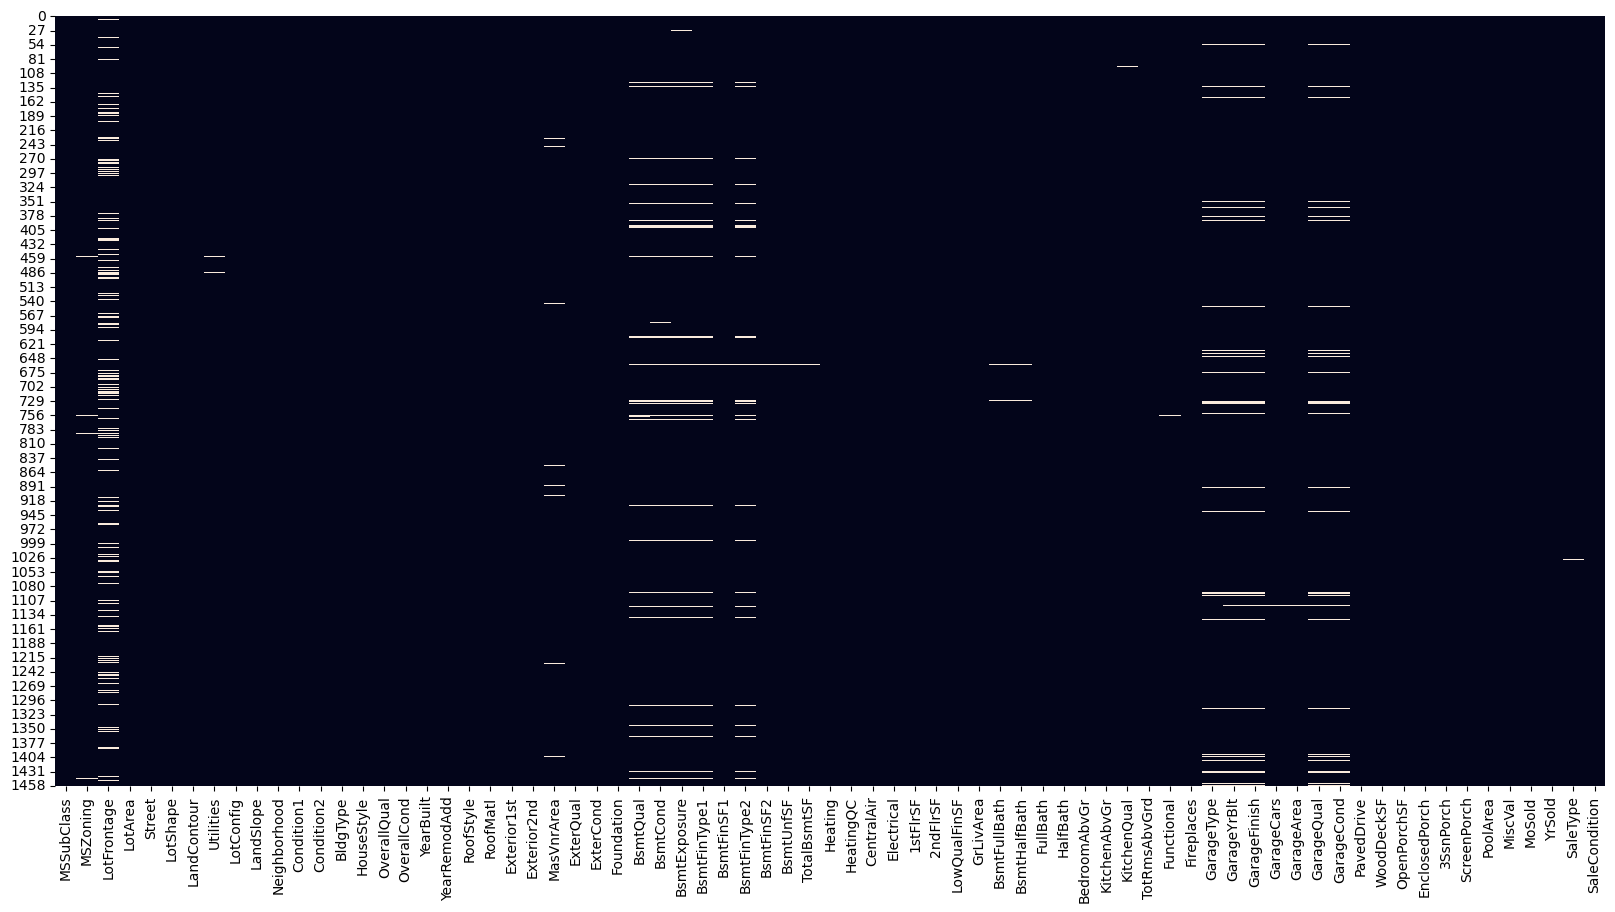

In [67]:
# display the missing value distribution in test data
plt.figure(figsize=(20, 10))
sns.heatmap(df_test.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

### 1.1 Drop rows with missing values accounting for less than 5% of the total records

In [68]:
# Drop missing values with less than 5% of total values
train_cols_to_drop = df_train.columns[df_train.isna().mean() <= 0.05]
print(train_cols_to_drop)
print(len(train_cols_to_drop))

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       

In [69]:
df_train.dropna(subset=train_cols_to_drop, inplace=True)

In [70]:
df_train.shape

(1412, 74)

In [71]:
# Drop missing values with less than 5% of total values
test_cols_to_drop = df_test.columns[df_test.isna().mean() <= 0.05]
print(test_cols_to_drop)
print(len(test_cols_to_drop))

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       

In [72]:
df_test.dropna(subset=test_cols_to_drop, inplace=True)

In [73]:
df_test.shape

(1388, 73)

In [74]:
# only show columns with missing values after dropping values <5%
print("train data columns with missing values after dropping <5% missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

train data columns with missing values after dropping <5% missing values


,count,%
GarageType,74,5.240793
GarageYrBlt,74,5.240793
GarageFinish,74,5.240793
GarageQual,74,5.240793
GarageCond,74,5.240793
LotFrontage,251,17.776204


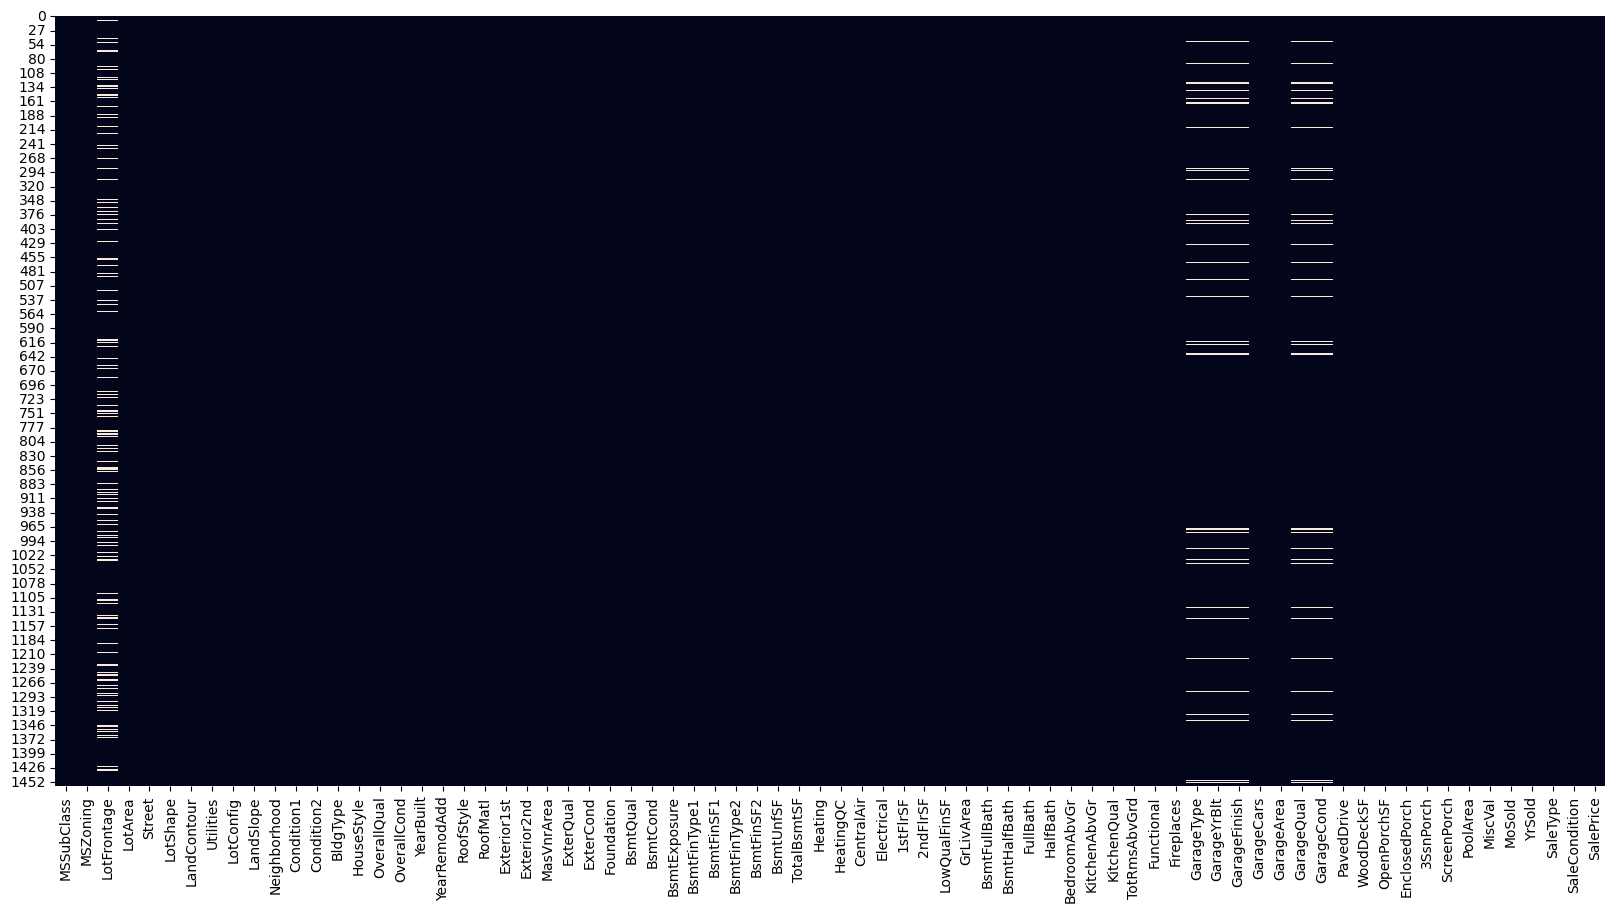

In [75]:
# display the missing value distribution in cleaned train data
plt.figure(figsize=(20, 10))
sns.heatmap(df_train.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

In [76]:
# only show columns with missing values in test data after cleaning
print("test data columns with missing values after dropping <5% missing values")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

test data columns with missing values after dropping <5% missing values


,count,%
GarageType,67,4.827089
GarageYrBlt,68,4.899135
GarageFinish,68,4.899135
GarageQual,68,4.899135
GarageCond,68,4.899135
LotFrontage,214,15.417867


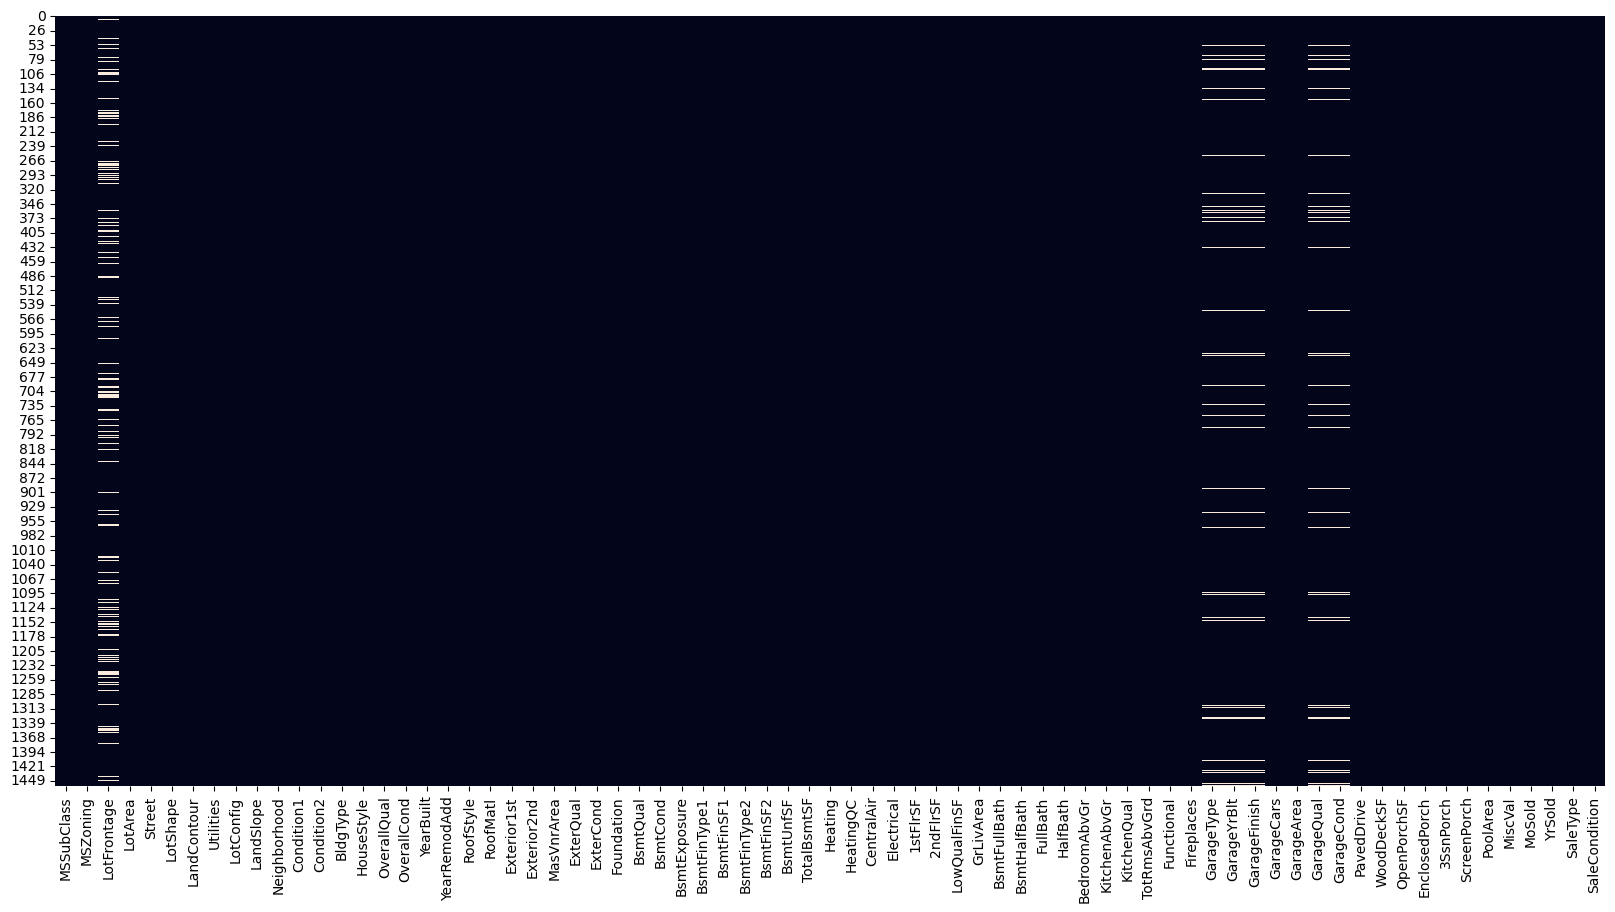

In [77]:
# display the missing value distribution in cleaned test data
plt.figure(figsize=(20, 10))
sns.heatmap(df_test.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

After removing records with null values, which accounts for less than 5% of the data, the distribution of remaining missing values in both test and train datasets shows a consistent pattern. Specifically, the missing values in five garage-related variables--GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond--occur in the same group of records. The proportion of these missing values is now either below 5% in test dataset or slightly above the 5% threshold--our established criterion for dropping data--but remains below 6% in train dataset. Given this, it is reasonable to drop these records, as this approach is both simpler and more practical than imputing values for each variable indiviually. 

### 1.2 Remove missing values in five garage-related variables: GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond

In [78]:
# Create list containing columns names of five garage-related variables
five_gar_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

# Drop missing values in train and test dataset
df_train.dropna(subset=five_gar_cols, inplace=True)
df_test.dropna(subset=five_gar_cols, inplace=True)

In [79]:
# only show columns with missing values in train dataset after dropping missing values in five garage-related variables
print("train data columns with missing values after dropping missing values in five garage-related variables")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

train data columns with missing values after dropping missing values in five garage-related variables


,count,%
LotFrontage,244,18.236173


In [80]:
# only show columns with missing values in test dataset after dropping missing values in five garage-related variables
print("test data columns with missing values after dropping missing values in five garage-related variables")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

test data columns with missing values after dropping missing values in five garage-related variables


,count,%
LotFrontage,211,15.984848


In [81]:
df_train.shape

(1338, 74)

In [82]:
df_test.shape

(1320, 73)

The two steps of removing missing values result in the deletion of 122 records from the train dataset, accounting for 8.4% of the total, and 139 records from the test dataset, accounting for 9.5% of the total. The LotFrontage column is the only variable with missing values, which account for 15-20% of the total records in both datasets. An imputation strategy will be used to address this missing data.

### 1.3 Imput missing values in the LotFrontage variable with the Median.

In [83]:
print("The LotFrontage column information in the train dataset\n")
dtype = df_train['LotFrontage'].dtype
top_5_values = (
        df_train['LotFrontage']
        .dropna()
        .value_counts().
        head(5)
        )
missing_count = df_train['LotFrontage'].isna().sum()
print(f"LotFrontage Dtype: {dtype}")
print(f"Top 5 most common non-null values: \n{top_5_values}")
print(f"Missing Count: {missing_count}\n")

The LotFrontage column information in the train dataset

LotFrontage Dtype: float64
Top 5 most common non-null values: 
LotFrontage
60.0    120
80.0     67
70.0     63
75.0     50
50.0     49
Name: count, dtype: int64
Missing Count: 244



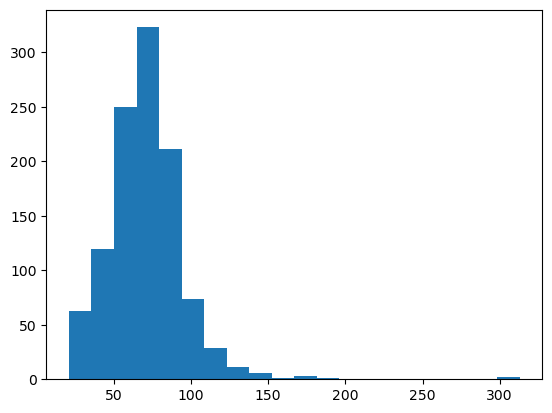

In [84]:
plt.hist(df_train['LotFrontage'].dropna(), bins=20)
plt.show()

In [85]:
print("The LotFrontage column information in the test dataset\n")
dtype = df_test['LotFrontage'].dtype
top_5_values = (
        df_test['LotFrontage']
        .dropna()
        .value_counts().
        head(5)
        )
missing_count = df_test['LotFrontage'].isna().sum()
print(f"LotFrontage Dtype: {dtype}")
print(f"Top 5 most common non-null values: \n{top_5_values}")
print(f"Missing Count: {missing_count}\n")

The LotFrontage column information in the test dataset

LotFrontage Dtype: float64
Top 5 most common non-null values: 
LotFrontage
60.0    117
80.0     66
70.0     60
50.0     51
75.0     47
Name: count, dtype: int64
Missing Count: 211



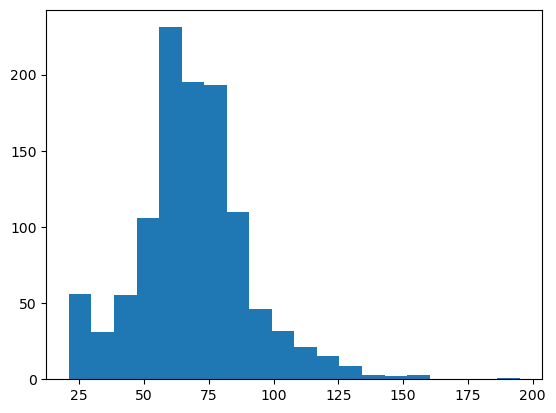

In [86]:
plt.hist(df_test['LotFrontage'].dropna(), bins=20)
plt.show()

Given the skewed shape of these two distributions, imputing with the median is likely the best choice, as it captures the central tendency of the majority of the data while minimizing the immpact of skewness.

In [87]:
# fill missing data in the train dataset with median value
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())

In [88]:
# fill missing data in the test dataset with median value
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())

In [89]:
# only show columns with missing values of Test data
print("Test data columns with missing values")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

Test data columns with missing values


,count,%


In [90]:
# only show columns with missing values of Train data
print("Train data columns with missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')


Train data columns with missing values


,count,%


In [91]:
df_train.shape

(1338, 74)

In [92]:
df_test.shape

(1320, 73)

All missing data in both the test and train datasets have now been addressed. 

# 2. Categorical Variables

In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemodAdd 

### 2.1 Filter Categorical Variables and examine their unique values.

In [94]:
categorical_vars = df_train.select_dtypes(include='object').columns
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
print(f"Total categorical variables: {len(categorical_vars)}")
print(f"Total numeric variables: {len(numeric_vars)}")

Total categorical variables: 37
Total numeric variables: 37


In [95]:
for col in categorical_vars:
    print(f"\nColumn: {col}")
    print(df_train[col].unique())
    print(df_train[col].value_counts())
    print(f"Unique count: {df_train[col].nunique()}")


Column: MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
MSZoning
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: count, dtype: int64
Unique count: 5

Column: Street
['Pave' 'Grvl']
Street
Pave    1333
Grvl       5
Name: count, dtype: int64
Unique count: 2

Column: LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LotShape
Reg    829
IR1    459
IR2     40
IR3     10
Name: count, dtype: int64
Unique count: 4

Column: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
LandContour
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64
Unique count: 4

Column: Utilities
['AllPub' 'NoSeWa']
Utilities
AllPub    1337
NoSeWa       1
Name: count, dtype: int64
Unique count: 2

Column: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: count, dtype: int64
Unique count: 5

Column: LandSlope
['Gtl' 'Mod' 'Sev']
LandSlope
Gtl    1265
Mod      61
Sev      12
Name: count, dtype: int64
Uniq

I observed that some variables exhibit very low variation, with extremely skewed and imbalance distributions heavily favoring one dominate category. These variables are unlikely to provide useful insights or generalize effectively. Next, I will identify all such variables.

In [96]:
dominate_cat_cols = []
for col in categorical_vars:
    count = df_train[col].value_counts().head(1).values[0]
    ratio = count / 1338
    if ratio > 0.9:
        print(f"\nColumn: {col}")
        print(f"The count of the most frequent category is: {count}")
        print(f"The proportion of the most frequent category is: {ratio}")
        dominate_cat_cols.append(col)
print("\n")
print(dominate_cat_cols)
print(len(dominate_cat_cols))


Column: Street
The count of the most frequent category is: 1333
The proportion of the most frequent category is: 0.9962630792227205

Column: LandContour
The count of the most frequent category is: 1206
The proportion of the most frequent category is: 0.9013452914798207

Column: Utilities
The count of the most frequent category is: 1337
The proportion of the most frequent category is: 0.9992526158445441

Column: LandSlope
The count of the most frequent category is: 1265
The proportion of the most frequent category is: 0.945440956651719

Column: Condition2
The count of the most frequent category is: 1324
The proportion of the most frequent category is: 0.9895366218236173

Column: RoofMatl
The count of the most frequent category is: 1314
The proportion of the most frequent category is: 0.9820627802690582

Column: BsmtCond
The count of the most frequent category is: 1237
The proportion of the most frequent category is: 0.9245142002989537

Column: Heating
The count of the most frequent cat

### 2.2 Drop 14 Categorical Variables with extremely skewed distributions.  

There are 14 variables--'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', and 'PavedDrive'--for which the most frequent categories dominate more than 90% of the records. This high dominance suggests that these variables likely have little predictive value and may be candidates for deletion. Removing these variables helps simplify the dataset and reduce redundancy.  

In [97]:
# remove 14 variables from the test and train dataset
df_test.drop(columns=dominate_cat_cols, inplace=True)
df_train.drop(columns=dominate_cat_cols, inplace=True)

In [98]:
df_train.shape

(1338, 60)

In [99]:
df_test.shape

(1320, 59)

### 2.3 Convert categorical variables to numeric values.

In [100]:
vars_to_num = df_train.select_dtypes(include='object').columns
print(f"Total categorical variables: {len(vars_to_num)}")
print(vars_to_num)

Total categorical variables: 23
Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')


In [101]:
for col in vars_to_num:
    print(f"\nColumn: {col}")
    print(df_train[col].unique())
    print(df_train[col].value_counts())
    print(f"Unique count: {df_train[col].nunique()}")


Column: MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
MSZoning
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: count, dtype: int64
Unique count: 5

Column: LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LotShape
Reg    829
IR1    459
IR2     40
IR3     10
Name: count, dtype: int64
Unique count: 4

Column: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: count, dtype: int64
Unique count: 5

Column: Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
T

After reviewing the unique values of 23 categorical variable, I identified 10 as ordinal variables, which will be converted to descending integers. Additionally, 3 nominal variables with more than 10 unique values will be transformed using Frequency Encoding, while 10 nominal variables with 10 or fewer unique values will be converted using one-hot encoding.

In [102]:
# Define three subgroups of categorical variables
ordinal_vars = ['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','GarageFinish', "HouseStyle"]
nominal_freq_vars = []
nominal_1hot_vars = []

for col in vars_to_num:
    if col not in ordinal_vars:
        if df_train[col].nunique() > 10:
            nominal_freq_vars.append(col)
        else:
            nominal_1hot_vars.append(col)

print("The ordinal variables are: ", ordinal_vars)
print(f"The number of ordinal_variables is: {len(ordinal_vars)}")
print("The nominal_variables for Frequency Encoding are: ", nominal_freq_vars)
print(f"The number of nominal_variables for Frequency Encoding is: {len(nominal_freq_vars)}")
print("The nominal_variables for One-Hot Encoding are: ", nominal_1hot_vars)
print(f"The number of nominal_variables for One-Hot Encoding is: {len(nominal_1hot_vars)}")
print(f"The number of categorical variables is: {len(vars_to_num)}")

The ordinal variables are:  ['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'HouseStyle']
The number of ordinal_variables is: 11
The nominal_variables for Frequency Encoding are:  ['Neighborhood', 'Exterior1st', 'Exterior2nd']
The number of nominal_variables for Frequency Encoding is: 3
The nominal_variables for One-Hot Encoding are:  ['MSZoning', 'LotConfig', 'Condition1', 'BldgType', 'RoofStyle', 'Foundation', 'GarageType', 'SaleType', 'SaleCondition']
The number of nominal_variables for One-Hot Encoding is: 9
The number of categorical variables is: 23


In [103]:
# Define a dictionary of dictionary containing map of value-to-integer for every ordinal variable
ordinal_vars_map = {
    "LotShape": {'Reg': 3, 'IR1': 2, 'IR2': 1, "IR3": 0}, 
    "ExterQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "ExterCond": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "BsmtQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1, "NA": 0}, 
    "BsmtExposure": {'Gd': 4, 'Av': 3, 'Mn': 2, "No": 1, "NA": 0}, 
    "BsmtFinType1": {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, "Rec": 3, "LwQ": 2, "Unf": 1, "NA": 0}, 
    "BsmtFinType2": {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, "Rec": 3, "LwQ": 2, "Unf": 1, "NA": 0}, 
    "HeatingQC": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "KitchenQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "GarageFinish": {'Fin': 3, 'RFn': 2, 'Unf': 1, "NA": 0},
    "HouseStyle": {'1Story': 1, '1.5Unf': 2, 'SFoyer': 3, 'SLvl': 4, '1.5Fin': 5, '2Story': 6, '2.5Unf': 7, '2.5Fin': 8}
    }

# Convert each subgroup of categorical variables to numeric values differently
for col in vars_to_num:
    if col in ordinal_vars_map: 
        # Retrieve value-to-integer map for each col
        value_to_int_map = ordinal_vars_map[col]
        # Convert to integer using the map
        df_train[col] = df_train[col].map(value_to_int_map)
        df_test[col] = df_test[col].map(value_to_int_map)


    # One-hot encoding
    elif col in nominal_1hot_vars: 
        # Generate one-hot encoded columns for the train dataset and drop the first column
        one_hot = pd.get_dummies(df_train[col], prefix=col).iloc[:, 1:]
        df_train = pd.concat([df_train, one_hot], axis=1).drop(columns=[col]) # Concatenate with the train set and drop the original column

        # Generate one-hot encoded columns for the test dataset
        one_hot_test = pd.get_dummies(df_test[col], prefix=col)
        
        # Ensure consistency in one-hot encoded columns
        for col1 in one_hot.columns:
            if col1 not in one_hot_test:
                one_hot_test[col1] = 0
        
        one_hot_test = one_hot_test[one_hot.columns]  # Align columns to ensure the same order and drop any excess in the test set
        df_test = pd.concat([df_test, one_hot_test], axis=1).drop(columns=col) # Concatenate with the test set and drop the original column
                
    # Frequency encoding
    else: 
        freq_encoding = df_train[col].value_counts(normalize=True) # use Frequency Encoding for nominal variables with many categories (>10 unique categories)
        df_train[col] = df_train[col].map(freq_encoding)
        df_test[col] = df_test[col].map(freq_encoding).fillna(0)


In [104]:
for col in nominal_freq_vars:
    print(df_train[col].value_counts())
    print(df_train[col].nunique())

Neighborhood
0.156203    209
0.109118    146
0.074738    100
0.062033     83
0.057549     77
0.056054     75
0.054559     73
0.052317     70
0.051570     69
0.039611     53
0.037369     50
0.035127     47
0.031390     42
0.030643     41
0.027653     37
0.021674     29
0.019432     26
0.018685     25
0.014948     20
0.012706     17
0.011211     15
0.008969     12
0.008221     11
0.006726      9
0.001495      2
Name: count, dtype: int64
25
Exterior1st
0.363229    486
0.157698    211
0.150224    201
0.136771    183
0.074738    100
0.038864     52
0.032885     44
0.015695     21
0.014948     20
0.011211     15
0.000747      3
0.001495      2
Name: count, dtype: int64
12
Exterior2nd
0.355007    475
0.147235    394
0.131540    176
0.094918    127
0.038117     51
0.023916     32
0.017190     23
0.016442     22
0.011958     16
0.007474     10
0.004484      6
0.001495      4
0.000747      2
Name: count, dtype: int64
13


In [105]:
for col in ordinal_vars:
    print(df_train[col].value_counts())
    print(df_train[col].nunique())

LotShape
3    829
2    459
1     40
0     10
Name: count, dtype: int64
4
ExterQual
3    803
4    477
5     51
2      7
Name: count, dtype: int64
4
ExterCond
3    1183
4     137
2      16
5       2
Name: count, dtype: int64
4
BsmtQual
3    594
4    592
5    120
2     32
Name: count, dtype: int64
4
BsmtExposure
1    887
3    213
4    127
2    111
Name: count, dtype: int64
4
BsmtFinType1
6    402
1    392
5    209
4    141
3    125
2     69
Name: count, dtype: int64
6
BsmtFinType2
1    1176
3      53
2      46
4      32
5      19
6      12
Name: count, dtype: int64
6
HeatingQC
5    704
3    380
4    217
2     36
1      1
Name: count, dtype: int64
5
KitchenQual
3    650
4    568
5     97
2     23
Name: count, dtype: int64
4
GarageFinish
1    580
2    413
3    345
Name: count, dtype: int64
3
HouseStyle
1    657
6    426
5    134
4     64
3     30
2     11
7     10
8      6
Name: count, dtype: int64
8


In [106]:
df_train.shape

(1338, 98)

In [107]:
df_test.shape

(1320, 97)

# 3. Numerical Variables

In [108]:
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
print(numeric_vars)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [109]:
dominate_num_cols = []
for col in numeric_vars:
    count = df_train[col].value_counts().head(1).values[0]
    ratio = count / 1338
    if ratio > 0.9:
        print(f"\nColumn: {col}")
        print(f"The count of the most frequent value is: {count}")
        print(f"The proportion of the most frequent value is: {ratio}")
        print(df_train[col].unique())
        print(f"Unique count: {df_train[col].nunique()}")
        print(df_train[col].value_counts().head(3))
        dominate_num_cols.append(col)
print("\n")
print(dominate_num_cols)
print(len(dominate_num_cols))


Column: LowQualFinSF
The count of the most frequent value is: 1320
The proportion of the most frequent value is: 0.9865470852017937
[  0 360 528 572 144 392 390 420 473 156  80 232 481 120 397 384]
Unique count: 16
LowQualFinSF
0      1320
80        3
360       2
Name: count, dtype: int64

Column: BsmtHalfBath
The count of the most frequent value is: 1258
The proportion of the most frequent value is: 0.9402092675635276
[0 1 2]
Unique count: 3
BsmtHalfBath
0    1258
1      79
2       1
Name: count, dtype: int64

Column: KitchenAbvGr
The count of the most frequent value is: 1299
The proportion of the most frequent value is: 0.9708520179372198
[1 2 3]
Unique count: 3
KitchenAbvGr
1    1299
2      38
3       1
Name: count, dtype: int64

Column: 3SsnPorch
The count of the most frequent value is: 1315
The proportion of the most frequent value is: 0.9828101644245142
[  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304]
Unique count: 20
3SsnPorch
0      1315
168  

There are 7 numeric variables--'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', and 'MiscVal'--for which the most frequent values dominate more than 90% of the records. This high dominance suggests that these variables likely have little predictive value. Removing them can helps simplify the dataset and reduce redundancy.  

In [110]:
# remove 7 numeric variables from the test and train dataset
df_test.drop(columns=dominate_num_cols, inplace=True)
df_train.drop(columns=dominate_num_cols, inplace=True)

In [111]:
categorical_vars = df_train.select_dtypes(include='object').columns
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
print(f"Total number of categorical variables is: {len(categorical_vars)}")
print(f"Total number of numeric variables is: {len(numeric_vars)}")

Total number of categorical variables is: 0
Total number of numeric variables is: 44


In [112]:
df_train.shape

(1338, 91)

In [113]:
df_test.shape

(1320, 90)

# 4. Visualize Relationships Between Variables

In [114]:
corr_matrix = df_train.corr()
threshold = 0.5
styled_corr_matrix = corr_matrix.style.applymap(lambda x: 'background-color: yellow' if abs(x) > threshold and abs(x) < 1 else '')
styled_corr_matrix

C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_24684\2264350234.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_corr_matrix = corr_matrix.style.applymap(lambda x: 'background-color: yellow' if abs(x) > threshold and abs(x) < 1 else '')


,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.358291,-0.134158,0.100663,-0.268453,0.441661,0.051690,-0.098153,0.056456,0.038513,-0.058083,-0.081322,0.031333,0.040774,-0.064669,0.087096,0.040500,0.037563,-0.069053,-0.049573,-0.079329,-0.141025,-0.263613,-0.006011,-0.258787,0.306709,0.068782,-0.011317,0.117720,0.197520,-0.065699,0.006118,0.014514,-0.024752,0.082040,0.009522,0.006872,-0.070278,-0.010175,-0.000359,-0.022598,-0.016283,-0.021591,-0.079599,0.189639,0.019570,-0.342310,0.273195,-0.038150,0.018102,0.048288,0.054329,-0.039493,0.042359,-0.039752,-0.032411,-0.033955,-0.006504,0.003625,-0.006143,0.395491,0.120058,0.413165,0.562328,0.136810,0.018653,-0.138887,0.006289,0.008317,-0.108033,0.097976,0.036127,-0.003222,-0.147082,0.046478,0.085336,0.031918,0.088441,0.031689,0.031773,0.109367,0.011770,0.026709,-0.049269,-0.023965,0.025468,-0.004069,0.019357,0.003328,0.041548,-0.055585
LotFrontage,-0.358291,1.000000,0.299912,-0.191501,0.148749,-0.043182,0.225596,-0.042686,0.102386,0.077667,0.056000,0.075101,0.176169,0.154103,-0.011981,0.163750,0.174947,0.068349,0.220452,0.018733,0.039939,0.103538,0.378077,0.092496,0.410498,0.067561,0.362841,0.102984,0.172439,0.038238,0.246398,0.164766,0.320930,0.229193,0.063617,0.200375,0.268588,0.332635,0.069594,0.143866,0.015055,0.013531,0.011704,0.327834,-0.099903,-0.043277,0.329777,-0.305004,-0.063963,-0.041836,0.000319,-0.135109,0.054768,-0.072036,0.156240,0.025434,-0.032594,-0.025698,0.004155,0.030905,-0.006278,0.030076,-0.323242,-0.312281,-0.176380,-0.044737,0.164729,0.029929,-0.001085,0.024561,0.042889,-0.011980,0.067858,0.199421,0.039691,0.074719,0.022285,-0.268678,-0.007715,-0.032522,0.030939,0.013295,-0.049735,0.127708,0.000468,-0.090586,-0.013112,-0.013257,0.013228,-0.087627,0.125683
LotArea,-0.134158,0.299912,1.000000,-0.316670,-0.059653,-0.003506,0.090451,0.001415,-0.005022,0.001681,-0.075613,-0.060404,0.096727,0.040570,0.010467,0.071873,0.237595,0.049754,0.210148,0.088143,0.110493,-0.014589,0.267188,-0.004783,0.288502,0.047773,0.255445,0.160687,0.115727,0.006052,0.120369,0.055219,0.185654,0.263061,-0.025700,0.102519,0.138228,0.168630,0.167822,0.084942,-0.017968,0.000118,-0.012066,0.254757,-0.088189,-0.031129,0.197701,-0.164968,0.173072,-0.003857,-0.010599,-0.130859,0.015785,-0.030745,0.044330,0.023539,0.010798,0.017387,-0.004996,-0.009836,0.105447,-0.005047,-0.136111,-0.172760,-0.105635,-0.009825,0.079237,0.004311,0.039453,0.074600,-0.049890,-0.010988,0.008105,0.103852,-0.003165,0.035809,0.009517,-0.138356,-0.008891,-0.003607,0.002375,0.000232,-0.012137,0.017550,-0.003582,-0.001004,-0.006739,-0.001475,-0.013141,0.006441,0.020112
LotShape,0.100663,-0.191501,-0.316670,1.000000,0.056711,-0.027660,-0.195847,0.034461,-0.230572,-0.182401,-0.095187,-0.090078,-0.080190,-0.179634,-0.010763,-0.2

In [115]:
# To display only the rows and columns that contain yellow background cells and exclude those without
corr_matrix = df_train.corr()
threshold = 0.5
# Identify the cells that meet the threshold condition
highlight_mask = (abs(corr_matrix) > threshold) & (abs(corr_matrix) < 1)
# Filter rows and columns with at least one highlighted cell
rows_to_keep = highlight_mask.any(axis=1)
cols_to_keep = highlight_mask.any(axis=0)      

# Extract the relevant portion of the correlation matrix
filtered_corr_matrix = corr_matrix.loc[rows_to_keep, cols_to_keep]

# Style the filtered correlation matrix
styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(
    lambda x: 'background-color: yellow' if abs(x) > threshold and abs(x) < 1 else ''
    )
# Disply the styled matrix
styled_filtered_corr_matrix

C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_24684\89106773.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(


,MSSubClass,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,Foundation_CBlock,Foundation_PConc,GarageType_Attchd,GarageType_Detchd,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,0.441661,0.051690,0.056456,0.038513,-0.058083,-0.081322,0.040774,0.087096,0.037563,-0.069053,-0.049573,-0.079329,-0.141025,-0.263613,-0.006011,-0.258787,0.306709,0.068782,-0.011317,0.117720,0.197520,-0.065699,0.006118,0.014514,0.082040,0.009522,0.006872,-0.070278,-0.079599,-0.342310,0.273195,-0.039493,0.042359,0.562328,0.136810,-0.138887,-0.108033,0.097976,-0.147082,0.088441,-0.049269,0.025468,0.041548,-0.055585
HouseStyle,0.441661,1.000000,0.152612,-0.082852,0.029917,0.036276,0.026664,0.049078,0.032190,-0.147929,-0.204609,-0.069700,-0.109710,-0.102050,-0.387132,0.053272,-0.372316,0.893779,0.489088,-0.188701,0.271273,0.579438,0.413691,0.043596,0.474061,-0.018034,0.025355,0.055875,-0.002950,0.118168,-0.184464,0.123873,-0.023757,-0.054290,-0.106045,0.173209,-0.198257,-0.195072,0.103067,-0.217761,0.091066,-0.043124,0.071095,0.067509,-0.050250
OverallQual,0.051690,0.152612,1.000000,0.570668,0.549460,0.295196,0.299827,0.722958,0.672961,0.172463,0.197441,-0.105259,-0.086014,0.292940,0.505897,0.449576,0.481978,0.281145,0.594470,0.083254,0.580425,0.249283,0.081994,0.667729,0.442941,0.545835,0.516528,0.591878,0.530092,0.783546,0.132927,-0.209730,-0.122171,0.101334,0.116978,-0.167449,0.188285,-0.480077,0.569152,0.294368,-0.389143,0.332307,-0.235661,-0.162843,0.327228
YearBuilt,0.056456,-0.082852,0.570668,1.000000,0.617156,0.510127,0.508237,0.593972,0.725856,0.330935,0.224264,-0.074624,-0.070403,0.147762,0.385146,0.453926,0.263585,0.006989,0.189146,0.175108,0.486777,0.227626,-0.080644,0.519624,0.099415,0.825172,0.583219,0.524076,0.443854,0.504297,0.260974,-0.397518,-0.101584,0.185276,0.236304,-0.029207,0.075288,-0.314006,0.666206,0.447619,-0.555519,0.352432,-0.239675,-0.175971,0.348773
YearRemodAdd,0.038513,0.029917,0.549460,0.617156,1.000000,0.459995,0.451480,0.595603,0.576662,0.194879,0.099681,-0.079724,-0.085268,0.171881,0.264281,0.551285,0.241889,0.120545,0.276580,0.099294,0.460120,0.169456,-0.074393,0.635635,0.174660,0.641585,0.452869,0.459449,0.386213,0.501435,0.078164,-0.166881,-0.109238,0.139040,0.159757,-0.019908,0.029296,-0.444893,0.579478,0.246721,-0.333813,0.327280,-0.176790,-0.128341,0.324076
Exterior1st,-0.058083,0.036276,0.295196,0.510127,0.459995,1.000000,0.951328,0.368094,0.391511,0.049121,-0.072721,-0.121173,-0.137965,0.212554,0.091777,0.440056,-0.001909,0.090440,0.071088,-0.013975,0.279143,0.089193,-0.018930,0.305168,0.083694,0.507760,0.302691,0.302685,0.245175,0.234201,0.070177,-0.113037,-0.059294,0.086929,0.001613,0.084176,-0.051229,-0.403581,0.523937,0.158365,-0.225531,0.240398,-0.148506,-0.126024,0.242761
Exterior2nd,-0.081322,0.026664,0.299827,0.508237,0.451480,0.951328,1.000000,0.361887,0.391362,0.048755,-0.063970,-0.114839,-0.131586,0.211956,0.103641,0.432021,0.020426,0.079035,0.078037,-0.009524,0.278699,0.094230,-0.013380,0.298202,0.087841,0.500840,0.313635,0.304163,0.255943,0.242096,0.074124,-0.114333,-0.060139,0.077362,0.001445,0.080033,-0.050860,-0.393707,0.513615,0.166693,-0.224335,0.241724,-0.157918,-0.122523,0.244243
ExterQual,0.040774,0.049078,0.722958,0.593972,0.595603,0.368094,0.361887,1.000000,0.645461,0.192803,0.173119,-0.100377,-0.094011,0.279647,0.460684,0.522331,0.391303,0.173978,0.436344,0.105922,0.495268,0.171485,-0.021105,0.711682,0.313274,0.580144,0.491138,0.519102,0.472674,0.669504,0.097680,-0.195400,-0.116034,0.135357,0.173999,-0.122251,0.141028,-0.497614,0.603850,0.250410,-0.339137,0.390547,-0.277922,-0.2

In [116]:
row_set = set(rows_to_keep[rows_to_keep==True])
col_set = set(cols_to_keep[cols_to_keep == True])

# compare the sets
are_identical =  row_set == col_set
print('Are row_set and col_set the same?', are_identical)
              

Are row_set and col_set the same? True


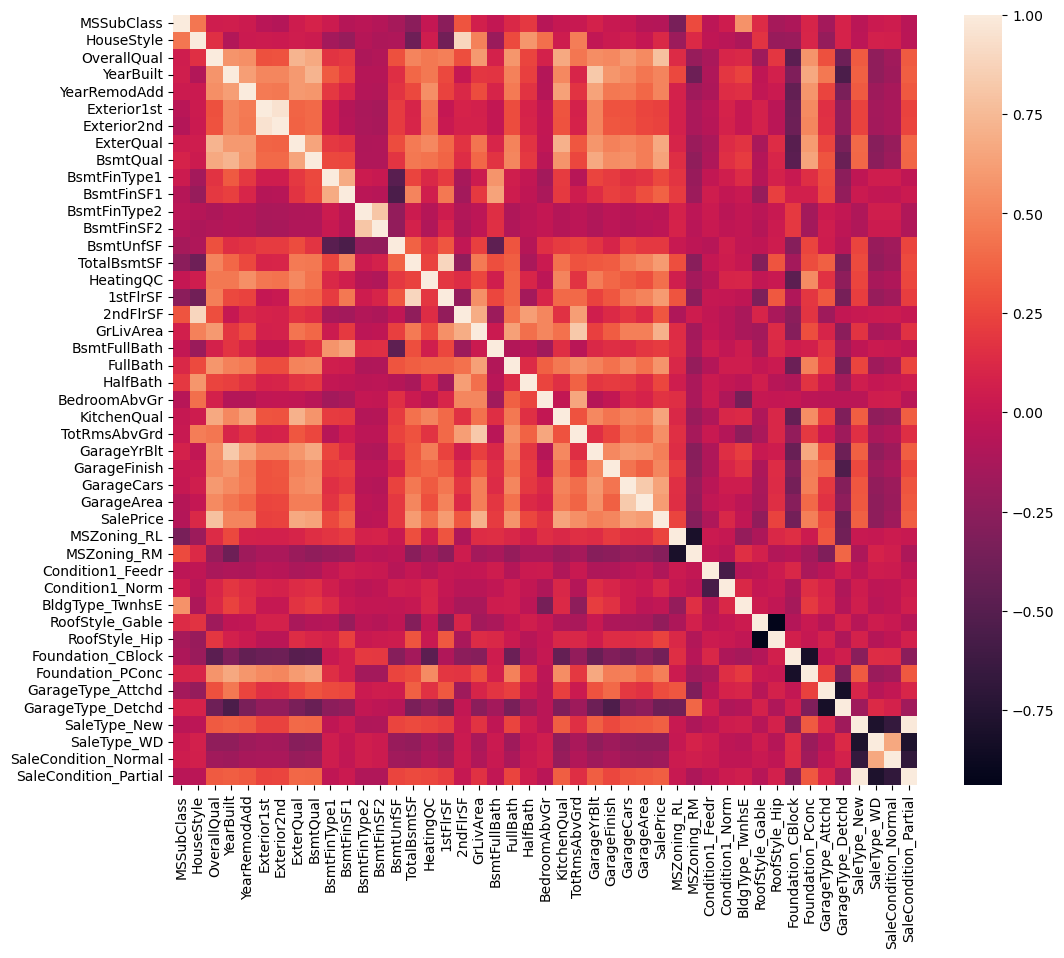

In [117]:
# Make a heatmap of the filtered maxtrix
plt.subplots(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix)
plt.show()

The variables highly correlated with the target variable (Absolute value of Correlation Coefficient |r| > 0.5) 'SalePrice' are ''OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrlivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars' and 'GarageArea'.  

In [119]:
# Save the two datasets
from library.sb_utils import save_file
current_dir = os.getcwd()
save_file(df_train, "df_train_EDA.csv", current_dir)
save_file(df_test, "df_test_EDA.csv", current_dir)

Writing file.  "c:\Users\Sheng Miao\OneDrive\桌面\SpringBoard\Springboard_MyProjects\Capstone_Two\df_train_EDA.csv"
Writing file.  "c:\Users\Sheng Miao\OneDrive\桌面\SpringBoard\Springboard_MyProjects\Capstone_Two\df_test_EDA.csv"


# 5. Summary

### 1. Remove missing values which account for less than 5% of the total records, as well as missing values in five garage-related variables--GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond--which account for less than 6% of the total records and exhibit a consistent pattern within the same group of records. The two steps of removing missing values result in the deletion of 122 records from the train dataset, accounting for 8.4% of the total, and 139 records from the test dataset, accounting for 9.5% of the total. The LotFrontage column is the only variable with missing values, which account for 15-20% of the total records in both datasets. An imputation strategy will be used to address this missing data. The missing data in the LotFrontage variable have been imputed with the median.  

### 2. There are 14 categorical variables--'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', and 'PavedDrive'-- and 7 numeric variables--'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', and 'MiscVal'--for which the most frequent categories/values dominate more than 90% of the records. This high dominance suggests that these variables likely have little predictive value and may be candidates for deletion. Removing these variables helps simplify the dataset and reduce redundancy.  

### 3. In both the training and testing datasets, 11 ordinal_variables were converted to descending integers, 3 nominal variables with more than 10 unique categories were converted using Frequency Encoding, and 10 nominal variables with fewer than 10 unique categories were converted using One-Hot Encoding. Consequently, the training dataset now contains 1338 records with 91 columns, while the testing0 dataset consists of 1320 records with 90 columns. 

### 4. Visualizing the relationships between variables reveals that the following variables are highly correlated with the target variable, SalePrice (absolute value of the correlation coefficient, |r| > 0.5): 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrlivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars' and 'GarageArea'.  